### The Data Science Process

**1. Problem Statement**
- Is it clear what the goal of the project is?
- What type of model will be developed?
- How will success be evaluated?
- Is the scope of the project appropriate?
- Is it clear who cares about this or why this is important to investigate?
- Does the student consider the audience and the primary and secondary stakeholders?

#### Define the problem:
We are a financial technology start up called Crypto Go that sells crypto range of products.

We are actively expanding advertising efforts to capture more market share.

However, with a limited budget, we need to maximize every advertising dollar with gaining good quality prospects who will be interested in our products.

Using Natural Language Processing, we have trained a classifier on user postings in crypto subreddit, together with another subreddit, with the Random Forest Classifier, MultinomialNB and Support Vector Classifier with a high degree of accuracy.

This is a binary classification problem - Whether a posting Belongs to Crypto subreddit OR Belongs to Other subreddit.

Our objective is to use the model to look for postings in other social media channels (e.g. Facebook, Youtube) to target our advertising of crypto products in these channels so that we can expand the market penetration of our crypto products to potential prospects. 

Success of the model will be evaluated by the Sensitivity score (or recall).

This project will be critical for our fintech startup as we will need to identify accurately channel postings in other social media channels (e.g. Facebook, Youtube) of users who have a deep interest in Crypto products 
so that we can expand our market penetration with a bigger prospects base.

The project will also be useful to Crypto lovers from other social media channels because they will be able to see the Crypto products solutioning that our fintech start up has to offer to meet their investment needs. 

The 2 subreddits from which we will be classifying the posts will be:

a. https://www.reddit.com/r/stocks/

b. https://www.reddit.com/r/CryptoCurrency/

### The Data Science Process

**2. Data Collection**
- Was enough data gathered to generate a significant result?
- Was data collected that was useful and relevant to the project?
- Was data collection and storage optimized through custom functions, pipelines, and/or automation?
- Was thought given to the server receiving the requests such as considering number of requests per second?

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

In [3]:
url = 'https://api.pushshift.io/reddit/search/submission'

params1 = {
    'subreddit' : 'stocks',
    'size' : 100, # 100 posts per request
    'before' : 1622018472 # Wednesday, May 26, 2021 4:41:12 PM GMT+08:00 /// https://www.epochconverter.com/     
}

res1 = requests.get(url, params1)
data1 = res1.json()
posts1 = data1['data']

In [4]:
len(posts1)

100

In [5]:
posts1[99]

{'all_awardings': [],
 'allow_live_comments': False,
 'author': '[deleted]',
 'author_flair_background_color': '',
 'author_flair_css_class': None,
 'author_flair_text': None,
 'author_flair_text_color': 'dark',
 'awarders': [],
 'banned_by': 'moderators',
 'can_mod_post': False,
 'contest_mode': False,
 'created_utc': 1621965988,
 'domain': 'self.stocks',
 'full_link': 'https://www.reddit.com/r/stocks/comments/nkw2t7/investment_advice_from_an_expert/',
 'gildings': {},
 'id': 'nkw2t7',
 'is_crosspostable': False,
 'is_meta': False,
 'is_original_content': False,
 'is_reddit_media_domain': False,
 'is_robot_indexable': False,
 'is_self': True,
 'is_video': False,
 'link_flair_background_color': '#646d73',
 'link_flair_css_class': 'advice',
 'link_flair_richtext': [],
 'link_flair_template_id': '823be0a6-65e6-11e5-9784-125ee764bc01',
 'link_flair_text': 'Advice',
 'link_flair_text_color': 'light',
 'link_flair_type': 'text',
 'locked': False,
 'media_only': False,
 'no_follow': True,
 '

In [6]:
df1 = pd.DataFrame(posts1)

In [7]:
df1.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,url,whitelist_status,wls,removed_by_category,post_hint,preview,author_cakeday,author_flair_background_color,author_flair_text_color,banned_by
0,[],False,preciouscode96,None,[],None,text,t2_h7r1vrc,False,False,...,https://www.reddit.com/r/stocks/comments/nlbzl...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Plus100power,None,[],None,text,t2_8jevuhzi,False,False,...,https://www.reddit.com/r/stocks/comments/nlbyt...,all_ads,6,moderator,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Grapefruit_Cultural,None,[],None,text,t2_57fezqhy,False,False,...,https://www.reddit.com/r/stocks/comments/nlbyj...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,762guy,None,[],None,text,t2_1dy6fnqt,False,False,...,https://www.reddit.com/r/stocks/comments/nlbaw...,all_ads,6,moderator,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,Stonkstrader84,None,[],None,text,t2_62d3sh0j,False,False,...,https://www.reddit.com/r/stocks/comments/nlaat...,all_ads,6,moderator,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Function to automate Webscraping

In [9]:
def pushshift_subreddit_scraper(sr = 'stocks', repeat = 30, size=100): # 100 posts per request, loop 30x = 3000 posts
    url = 'https://api.pushshift.io/reddit/search/submission'
    time_now = 1622018472 #Current Epoch value for date and time = Wednesday, May 26, 2021 4:41:12 PM GMT+08:00 
    df = pd.DataFrame()
    
    for i in range(repeat):
        params = {
            'subreddit' : sr,
            'size' : size,
            'before' : time_now
        }
        res = requests.get(url,params)
        data = pd.DataFrame(res.json()['data'])
        df = df.append(data, ignore_index = True)
        time_now = df.iloc[size-101]['created_utc']
    return df[['subreddit', 'title', 'selftext', 'created_utc']]

In [10]:
df_stocks = pushshift_subreddit_scraper('stocks', 30, 100)

In [11]:
df_stocks.shape

(3000, 4)

In [12]:
df_stocks.head()

,subreddit,title,selftext,created_utc
0,stocks,What's your thought on ICLN for long term?,As the title says I'm really interested in you...,1622018105
1,stocks,Help investing 50K!!,[removed],1622018005
2,stocks,Investment into nuclear fusion?,I was doing some more research on fusion for t...,1622017975
3,stocks,Twitter/Facebook ban in India,[removed],1622015329
4,stocks,Royal Helium // North American Helium Industry,[removed],1622011206


In [13]:
# Webscrape https://www.reddit.com/r/CryptoCurrency/ for 3000 posts
df_CryptoCurrency = pushshift_subreddit_scraper('CryptoCurrency', 30, 100)

In [14]:
df_CryptoCurrency.shape

(3000, 4)

In [15]:
df_CryptoCurrency.head()

,subreddit,title,selftext,created_utc
0,CryptoCurrency,I want to invest my savings into crypto as my ...,Well I was called to my local bank a few years...,1622018382
1,CryptoCurrency,Dubai Debuts Own Cryptocurrency Valued At $0.1...,,1622018364
2,CryptoCurrency,Free crypto app that show my real time positio...,"Hi,\n\nI have positions on binance us, coinbas...",1622018343
3,CryptoCurrency,If you want to learn / earn more with crypto s...,,1622018184
4,CryptoCurrency,"Apes, get ready for another crypto sell off &a...",,1622018176


### The Data Science Process

**3. Data Cleaning and EDA**
- Are missing values imputed/handled appropriately?
- Are distributions examined and described?
- Are outliers identified and addressed?
- Are appropriate summary statistics provided?
- Are steps taken during data cleaning and EDA framed appropriately?
- Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?

In [16]:
df_stocks['selftext'] = df_stocks['selftext'].replace('[removed]', '')

In [17]:
df_stocks['selftext'] = df_stocks['selftext'].replace('nan', '')

In [18]:
df_stocks['title_selftext'] = df_stocks['title'] + df_stocks['selftext']

In [19]:
df_stocks['title_selftext'] = df_stocks['title_selftext'].astype(str)

In [20]:
df_stocks['title'] = df_stocks['title'].astype(str)

In [21]:
df_stocks['selftext'] = df_stocks['selftext'].astype(str)

In [22]:
df_CryptoCurrency['selftext'] = df_CryptoCurrency['selftext'].replace('[removed]', '')

In [23]:
df_CryptoCurrency['selftext'] = df_CryptoCurrency['selftext'].replace('nan', '')

In [24]:
df_CryptoCurrency['title_selftext'] = df_CryptoCurrency['title'] + df_CryptoCurrency['selftext']

In [25]:
df_CryptoCurrency['title_selftext'] = df_CryptoCurrency['title_selftext'].astype(str)

In [26]:
df_CryptoCurrency['title'] = df_CryptoCurrency['title'].astype(str)

In [27]:
df_CryptoCurrency['selftext'] = df_CryptoCurrency['selftext'].astype(str)

In [28]:
df_stocks.to_csv("./datasets/stocks.csv", index=False)

In [29]:
df_CryptoCurrency.to_csv("./datasets/CryptoCurrency.csv", index=False)

#### EDA

In [30]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   subreddit       3000 non-null   object
 1   title           3000 non-null   object
 2   selftext        3000 non-null   object
 3   created_utc     3000 non-null   int64 
 4   title_selftext  3000 non-null   object
dtypes: int64(1), object(4)
memory usage: 117.3+ KB


In [31]:
df_stocks.isnull().sum()

subreddit         0
title             0
selftext          0
created_utc       0
title_selftext    0
dtype: int64

In [32]:
df_stocks.dtypes

subreddit         object
title             object
selftext          object
created_utc        int64
title_selftext    object
dtype: object

In [33]:
df_stocks.describe(include = 'all')

,subreddit,title,selftext,created_utc,title_selftext
count,3000,3000,3000,3.000000e+03,3000
unique,1,2849,968,NaN,2888
top,stocks,Portfolio isn't looking great - 19 y/o Investor,,NaN,nan
freq,3000,10,1991,NaN,13
mean,NaN,NaN,NaN,1.621268e+09,NaN
std,NaN,NaN,NaN,3.907070e+05,NaN
min,NaN,NaN,NaN,1.620671e+09,NaN
25%,NaN,NaN,NaN,1.620913e+09,NaN
50%,NaN,NaN,NaN,1.621269e+09,NaN
75%,NaN,NaN,NaN,1.621566e+09,NaN


In [34]:
df_stocks['title_selftext_length'] = df_stocks['title_selftext'].apply(len)

In [35]:
df_stocks['title_length'] = df_stocks['title'].apply(len)

In [36]:
df_stocks['selftext_length'] = df_stocks['selftext'].apply(len)

In [37]:
df_stocks.describe(include = 'all')

,subreddit,title,selftext,created_utc,title_selftext,title_selftext_length,title_length,selftext_length
count,3000,3000,3000,3.000000e+03,3000,3000.000000,3000.000000,3000.000000
unique,1,2849,968,NaN,2888,NaN,NaN,NaN
top,stocks,Portfolio isn't looking great - 19 y/o Investor,,NaN,nan,NaN,NaN,NaN
freq,3000,10,1991,NaN,13,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.621268e+09,NaN,431.687667,47.555333,384.397333
std,NaN,NaN,NaN,3.907070e+05,NaN,1285.444704,29.463021,1281.294378
min,NaN,NaN,NaN,1.620671e+09,NaN,3.000000,12.000000,0.000000
25%,NaN,NaN,NaN,1.620913e+09,NaN,29.000000,25.000000,0.000000
50%,NaN,NaN,NaN,1.621269e+09,NaN,58.000000,40.000000,0.000000
75%,NaN,NaN,NaN,1.621566e+09,NaN,409.000000,62.000000,359.000000


In [38]:
df_stocks.head()

,subreddit,title,selftext,created_utc,title_selftext,title_selftext_length,title_length,selftext_length
0,stocks,What's your thought on ICLN for long term?,As the title says I'm really interested in you...,1622018105,What's your thought on ICLN for long term?As t...,658,42,616
1,stocks,Help investing 50K!!,,1622018005,Help investing 50K!!,20,20,0
2,stocks,Investment into nuclear fusion?,I was doing some more research on fusion for t...,1622017975,Investment into nuclear fusion?I was doing som...,588,31,557
3,stocks,Twitter/Facebook ban in India,,1622015329,Twitter/Facebook ban in India,29,29,0
4,stocks,Royal Helium // North American Helium Industry,,1622011206,Royal Helium // North American Helium Industry,46,46,0


In [39]:
df_stocks2 = df_stocks[['title_selftext', 'subreddit']]

X2 = df_stocks2['title_selftext'].fillna(' ')
y2 = df_stocks2['subreddit'].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X2, y2, random_state=42)

In [41]:
cvec = CountVectorizer(stop_words = 'english') # stop words is english
cvec.fit(X_train)
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)

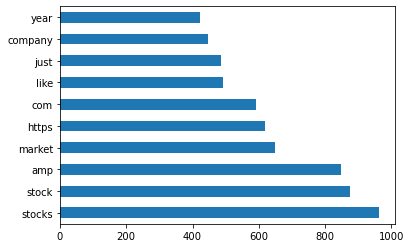

In [42]:
X_train_df = pd.DataFrame(X_train.todense(), 
                          columns=cvec.get_feature_names())

# plot top occuring words
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

In [43]:
df_CryptoCurrency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   subreddit       3000 non-null   object
 1   title           3000 non-null   object
 2   selftext        3000 non-null   object
 3   created_utc     3000 non-null   int64 
 4   title_selftext  3000 non-null   object
dtypes: int64(1), object(4)
memory usage: 117.3+ KB


In [44]:
df_CryptoCurrency.isnull().sum()

subreddit         0
title             0
selftext          0
created_utc       0
title_selftext    0
dtype: int64

In [45]:
df_CryptoCurrency.dtypes

subreddit         object
title             object
selftext          object
created_utc        int64
title_selftext    object
dtype: object

In [46]:
df_CryptoCurrency['title_selftext_length'] = df_CryptoCurrency['title_selftext'].apply(len)

In [47]:
df_CryptoCurrency['title_length'] = df_CryptoCurrency['title'].apply(len)

In [48]:
df_CryptoCurrency['selftext_length'] = df_CryptoCurrency['selftext'].apply(len)

In [49]:
df_CryptoCurrency.describe(include = 'all')

,subreddit,title,selftext,created_utc,title_selftext,title_selftext_length,title_length,selftext_length
count,3000,3000,3000,3.000000e+03,3000,3000.000000,3000.000000,3000.000000
unique,1,2874,1027,NaN,2909,NaN,NaN,NaN
top,CryptoCurrency,What would you do?,,NaN,"Cleared for takeoff, LET'S BUY!",NaN,NaN,NaN
freq,3000,3,1961,NaN,3,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.621938e+09,NaN,323.897000,57.295000,266.618667
std,NaN,NaN,NaN,4.208018e+04,NaN,680.924281,44.885702,679.396010
min,NaN,NaN,NaN,1.621875e+09,NaN,1.000000,1.000000,0.000000
25%,NaN,NaN,NaN,1.621898e+09,NaN,38.000000,27.000000,0.000000
50%,NaN,NaN,NaN,1.621940e+09,NaN,78.000000,47.000000,0.000000
75%,NaN,NaN,NaN,1.621972e+09,NaN,382.250000,73.000000,335.000000


In [50]:
df_CryptoCurrency.head()

,subreddit,title,selftext,created_utc,title_selftext,title_selftext_length,title_length,selftext_length
0,CryptoCurrency,I want to invest my savings into crypto as my ...,Well I was called to my local bank a few years...,1622018382,I want to invest my savings into crypto as my ...,977,90,887
1,CryptoCurrency,Dubai Debuts Own Cryptocurrency Valued At $0.1...,,1622018364,Dubai Debuts Own Cryptocurrency Valued At $0.1...,56,56,0
2,CryptoCurrency,Free crypto app that show my real time positio...,"Hi,\n\nI have positions on binance us, coinbas...",1622018343,Free crypto app that show my real time positio...,524,111,413
3,CryptoCurrency,If you want to learn / earn more with crypto s...,,1622018184,If you want to learn / earn more with crypto s...,101,101,0
4,CryptoCurrency,"Apes, get ready for another crypto sell off &a...",,1622018176,"Apes, get ready for another crypto sell off &a...",291,291,0


In [51]:
df_CryptoCurrency2 = df_CryptoCurrency[['title_selftext', 'subreddit']]

X3 = df_CryptoCurrency2['title_selftext'].fillna(' ')
y3 = df_CryptoCurrency2['subreddit'].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X3, y3, random_state=42)

In [53]:
cvec = CountVectorizer(stop_words = 'english')
cvec.fit(X_train)
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)

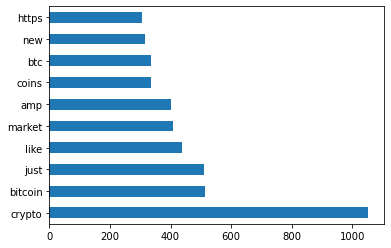

In [54]:
X_train_df2 = pd.DataFrame(X_train.todense(), 
                          columns=cvec.get_feature_names())

# plot top occuring words
X_train_df2.sum().sort_values(ascending=False).head(10).plot(kind='barh');

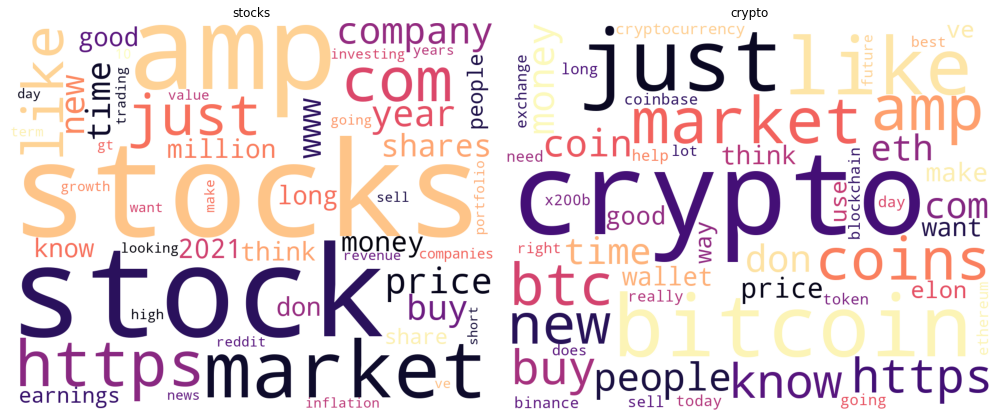

In [55]:
# set up WordCloud
wc_stocks = WordCloud(max_words= 50, width = 1000, height = 800, background_color ='white', colormap='magma').generate_from_frequencies(X_train_df.sum())
wc_crypto = WordCloud(max_words= 50, width = 1000, height = 800, background_color ='white', colormap='magma').generate_from_frequencies(X_train_df2.sum())

# plot the WordCloud image 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6))
ax[0].imshow(wc_stocks)
ax[0].axis('off')
ax[0].set_title('stocks')
ax[1].imshow(wc_crypto)
ax[1].axis('off')
ax[1].set_title('crypto')
plt.tight_layout()

In [56]:
len_0_stocks = df_stocks['title_selftext_length'] == 0 # there are no zero length posts for title+selftext

In [57]:
df_stocks[len_0_stocks] # there are no zero length posts for title+selftext

,subreddit,title,selftext,created_utc,title_selftext,title_selftext_length,title_length,selftext_length


In [58]:
df_stocks.shape

(3000, 8)

In [59]:
df_stocks.sort_values('title_selftext_length').head(20)

,subreddit,title,selftext,created_utc,title_selftext,title_selftext_length,title_length,selftext_length
99,stocks,Investment advice from an expert,nan,1621965988,nan,3,32,3
788,stocks,"Here is a Market Recap for today Thursday, May...",nan,1621544589,nan,3,55,3
1423,stocks,Australis Names Leah S. Bailey as Chief Busine...,nan,1621289045,nan,3,68,3
1378,stocks,China Mobile official announced the return of ...,nan,1621306792,nan,3,54,3
941,stocks,HK stocks' blockchain concept stocks opened sh...,nan,1621480294,nan,3,57,3
2304,stocks,How I turned 10k into 50k with mainly pennysto...,nan,1620896626,nan,3,115,3
2585,stocks,China's Meituan shares dive as rising costs in...,nan,1620805500,nan,3,58,3
1542,stocks,BNGO To The Moon.,nan,1621257279,nan,3,17,3
2305,stocks,How I turned 10k into 50k with mainly pennysto...,nan,1620896434,nan,3,109,3
2294,stocks,JPMorgan reports 80% increase in NIO ownership.,nan,1620902540,nan,3,47,3


In [60]:
title_selftext_length_3_indexes = df_stocks[df_stocks['title_selftext_length'] == 3].index

In [61]:
df_stocks.drop(title_selftext_length_3_indexes, inplace = True) # Drop title+selftext == nan

In [62]:
df_stocks.sort_values('title_selftext_length').head(20)

,subreddit,title,selftext,created_utc,title_selftext,title_selftext_length,title_length,selftext_length
1158,stocks,BNGO Full DD,,1621393907,BNGO Full DD,12,12,0
566,stocks,SQUARE STOCK,,1621657442,SQUARE STOCK,12,12,0
2595,stocks,What to use?,,1620798089,What to use?,12,12,0
1529,stocks,Square stock,,1621262599,Square stock,12,12,0
1624,stocks,EFT question,,1621206127,EFT question,12,12,0
1804,stocks,Burger Fi🍔🍔🍔,,1621092926,Burger Fi🍔🍔🍔,12,12,0
962,stocks,short seller,,1621470542,short seller,12,12,0
694,stocks,New IPO OTLY,,1621606208,New IPO OTLY,12,12,0
147,stocks,FTXP ON MOVE,,1621944837,FTXP ON MOVE,12,12,0
2259,stocks,Repo Markets,,1620911185,Repo Markets,12,12,0


In [63]:
df_stocks.shape

(2987, 8)

In [64]:
df_stocks.describe(include = 'all')

,subreddit,title,selftext,created_utc,title_selftext,title_selftext_length,title_length,selftext_length
count,2987,2987,2987,2.987000e+03,2987,2987.000000,2987.000000,2987.000000
unique,1,2840,967,NaN,2887,NaN,NaN,NaN
top,stocks,Portfolio isn't looking great - 19 y/o Investor,,NaN,Portfolio isn't looking great - 19 y/o Investor,NaN,NaN,NaN
freq,2987,10,1991,NaN,10,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.621268e+09,NaN,433.553398,47.496150,386.057248
std,NaN,NaN,NaN,3.909085e+05,NaN,1287.927931,29.454272,1283.832809
min,NaN,NaN,NaN,1.620671e+09,NaN,12.000000,12.000000,0.000000
25%,NaN,NaN,NaN,1.620914e+09,NaN,29.000000,25.000000,0.000000
50%,NaN,NaN,NaN,1.621269e+09,NaN,59.000000,40.000000,0.000000
75%,NaN,NaN,NaN,1.621568e+09,NaN,411.000000,62.000000,361.500000


In [65]:
df_CryptoCurrency.shape

(3000, 8)

In [66]:
df_CryptoCurrency.sort_values('title_selftext_length').head(20)

,subreddit,title,selftext,created_utc,title_selftext,title_selftext_length,title_length,selftext_length
2429,CryptoCurrency,🥴,,1621890663,🥴,1,1,0
1304,CryptoCurrency,😁,,1621949053,😁,1,1,0
1166,CryptoCurrency,:(,,1621954382,:(,2,2,0
1006,CryptoCurrency,PI,,1621960991,PI,2,2,0
798,CryptoCurrency,💸💸💸,,1621969078,💸💸💸,3,3,0
2960,CryptoCurrency,XVS,,1621875819,XVS,3,3,0
1759,CryptoCurrency,LFC,,1621924297,LFC,3,3,0
2094,CryptoCurrency,ETC,,1621904268,ETC,3,3,0
1551,CryptoCurrency,Ape together strong,nan,1621937276,nan,3,19,3
1331,CryptoCurrency,Dip,,1621947887,Dip,3,3,0


In [67]:
df_CryptoCurrency.loc[df_CryptoCurrency['selftext'] == 'nan', :].head(10)

,subreddit,title,selftext,created_utc,title_selftext,title_selftext_length,title_length,selftext_length
675,CryptoCurrency,What do you think about ETC?,nan,1621975671,nan,3,28,3
1551,CryptoCurrency,Ape together strong,nan,1621937276,nan,3,19,3
2855,CryptoCurrency,ddd,nan,1621878806,nan,3,3,3


In [68]:
crypto_selftext_nan_indexes = df_CryptoCurrency[df_CryptoCurrency['selftext'] == 'nan'].index

In [69]:
df_CryptoCurrency.drop(crypto_selftext_nan_indexes, inplace = True) # Drop title+selftext == nan

In [70]:
df_CryptoCurrency.shape

(2997, 8)

In [71]:
df_CryptoCurrency.sort_values('title_selftext_length').head(20)

,subreddit,title,selftext,created_utc,title_selftext,title_selftext_length,title_length,selftext_length
2429,CryptoCurrency,🥴,,1621890663,🥴,1,1,0
1304,CryptoCurrency,😁,,1621949053,😁,1,1,0
1006,CryptoCurrency,PI,,1621960991,PI,2,2,0
1166,CryptoCurrency,:(,,1621954382,:(,2,2,0
2094,CryptoCurrency,ETC,,1621904268,ETC,3,3,0
1331,CryptoCurrency,Dip,,1621947887,Dip,3,3,0
2960,CryptoCurrency,XVS,,1621875819,XVS,3,3,0
798,CryptoCurrency,💸💸💸,,1621969078,💸💸💸,3,3,0
1759,CryptoCurrency,LFC,,1621924297,LFC,3,3,0
1908,CryptoCurrency,Wow,,1621914608,Wow,3,3,0


In [72]:
df_CryptoCurrency.describe(include = 'all')

,subreddit,title,selftext,created_utc,title_selftext,title_selftext_length,title_length,selftext_length
count,2997,2997,2997,2.997000e+03,2997,2997.000000,2997.000000,2997.000000
unique,1,2871,1026,NaN,2908,NaN,NaN,NaN
top,CryptoCurrency,Ethereum has 'much higher utility' than Bitcoi...,,NaN,"Cleared for takeoff, LET'S BUY!",NaN,NaN,NaN
freq,2997,3,1961,NaN,3,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.621938e+09,NaN,324.218218,57.335669,266.882549
std,NaN,NaN,NaN,4.208169e+04,NaN,681.189355,44.888552,679.684836
min,NaN,NaN,NaN,1.621875e+09,NaN,1.000000,1.000000,0.000000
25%,NaN,NaN,NaN,1.621898e+09,NaN,38.000000,27.000000,0.000000
50%,NaN,NaN,NaN,1.621940e+09,NaN,78.000000,47.000000,0.000000
75%,NaN,NaN,NaN,1.621972e+09,NaN,383.000000,73.000000,335.000000


In [73]:
df_stocks.to_csv("./datasets/stocks_eda.csv", index=False)

In [74]:
df_CryptoCurrency.to_csv("./datasets/CryptoCurrency_eda.csv", index=False)